# OWA Tests

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

In [90]:
# Bum Functions:

k = 1

def _B(x, t, j, k):
    if k == 0:
        return 1 if t[j] <= x and x < t[j + 1] else 0
    
    p = ((x - t[j]) / (t[j + k] - t[j])) * _B(x, t, j, k - 1) if t[j + k] - t[j] > 0 else 0
    if t[j + k + 1] - t[j + 1] > 0:
        q = ((t[j + k + 1] - x) / (t[j + k + 1] - t[j + 1])) * _B(x, t, j + 1, k - 1)
    elif t[j + k + 1] - x == 0:
        q = 1
    else:
        q = 0
    return p + q

B = np.vectorize(_B)
B.excluded.add(1)

def q(x, a, t):
    return np.matmul(a, np.array([B(x, t, j, k) for j in np.arange(t.size - 2)]))

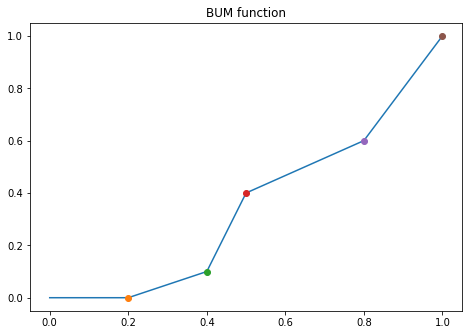

In [118]:
a = np.array([0, 0.1, 0.4, 0.6, 1])
t = np.array([0, 0.2, 0.4, 0.5, 0.8, 1, 1])

x = np.arange(0,1.001,0.001)
y = q(x, a, t)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, y)
ax.set_title("BUM function")

for i in range(a.size):
    ax.plot(t[i + 1], a[i], "o")

Lambda L1-norm: 1.0


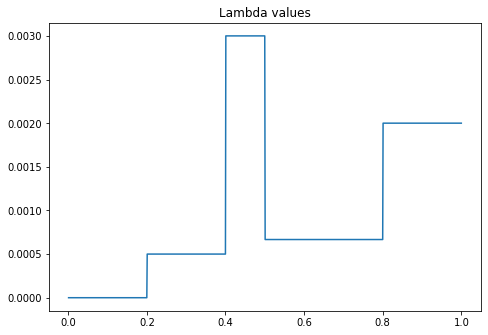

In [121]:
n = 1000
pos = np.arange(1, n+1) / n
pos_offset = np.arange(n) / n
l = q(pos, a, t) - q(pos_offset, a, t)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(pos, l)
ax.set_title("Lambda values")

print("Lambda L1-norm:", np.sum(l))